# CE-40959: Deep Learning
## HW1
#### Name: Pouya Khani
#### Student No.: 99210283

Please read the codes and instructions given to you carefully.

In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt
from model import *
from linear import *
from module import *
from optimizer import *
from relu import *
from sgd import *
from sigmoid import *
from softmax_crossentropy import *

## 1. Modules
In this problem you see some classes for typical modules used in neural networks. These modules include:

1. **`ReLU`**: ReLU activation function

2. **`Sigmoid`**: Sigmoid activation function

3. **`SoftmaxCrossEntropy`**: A module which represents the softmax activation function followed by a cross entropy loss function.

4. **`Linear`**: Fully connected layer which multiplies the input by a weight matrix and adds a bias term to it

In this problem you have to implement `forward()` and `backward()` functions of the modules in the above list. Then your implemented codes will be tested here in this notebook.


### 1.1. Activation Functions
Open files `relu.py` and `sigmoid.py`. There you can see **`ReLU`** and **`Sigmoid`** classes. 
Implement `forward()` and `backward()` functions of theses classes.

Here are some tips that might help you:<br/>
**1)** `forward()` function of the layers takes an input called `x` which is a numpy 2d-array with shape `(N, D)`. Implement the forward pass corresponding to considered function. Store the results of forward pass in `out`.<br/>
**2)** `backward()` function of the layers takes a parameter called `dout`. `dout` is the gradient of loss w.r.t. the ouput of layer in the forward pass. Provided `dout`, you have to compute the gradient w.r.t. the inputs (i.e. `x`)  to the layer. Store the results in `dx`. <br/>
**3)** For implementing backward pass, you may need some of the variables computed during forward pass; Save these variables in the `self.cache` attribute of the layer during forward pass and use them in the backward pass.<br/>
**4)** Test your implementation with the following cells. You should see a small value as error between your funnctions outputs and `correct output`, `correct_dx` for each activation functions. We get error of orders 1e-8 and less.

In [6]:
###########################################################################
#                             Relu Test                                   #
###########################################################################
np.random.seed(22)
N = 5
d = 6
x = np.random.randn(N,d)
relu = ReLU('test')
print('Relu Test Cell:')
output = relu.forward(x)
correct_output = [[0.,         0. ,        1.08179168, 0.,         0.  ,       0.   ,     ],
                  [0.9188215 , 0.  ,       0.62649346, 0. ,        0.02885512, 0.,        ],
                  [0.58775221, 0.75231758, 0.   ,      1.05597241 ,0.74775027, 1.06467659],
                  [1.52012959, 0.  ,       1.85998989, 0.  ,       0. ,        0.337325  ],
                  [1.04672873 ,0.62914334, 0.36305909, 0.5557497,  0.,         0.02369477]]

print('Relative error forward pass:', np.linalg.norm(output - correct_output))
    
dx = relu.backward(np.ones((N,d), dtype=np.float32))
correct_dx = [[0., 0. ,1. ,0. ,0., 0.],
              [1., 0. ,1., 0. ,1., 0.],
              [1. ,1. ,0. ,1., 1., 1.],
              [1. ,0. ,1., 0., 0. ,1.],
              [1. ,1. ,1. ,1. ,0., 1.]]
print('Relative error backward pass:', np.linalg.norm(dx - correct_dx))

Relu Test Cell:
Relative error forward pass: 1.2327591637534371e-08
Relative error backward pass: 0.0


In [7]:
###########################################################################
#                             sigmoid Test                                #
###########################################################################
np.random.seed(22)
N=5
d=6
x = np.random.randn(N,d)
sigmoid = Sigmoid('test')
print('Sigmoid Test Cell:')    
output = sigmoid.forward(x)
correct_output = [[0.4770287,  0.18795539, 0.74683289, 0.44045266, 0.37962761, 0.26849495],
                  [0.71480192, 0.24905997, 0.65169394, 0.36319727, 0.50721328, 0.44256287],
                  [0.64284923, 0.67968348, 0.25759572, 0.74192012, 0.6786883,  0.74358323],
                  [0.82055756, 0.18413151, 0.86529577, 0.16817555, 0.34387488, 0.58354059],
                  [0.74014623, 0.65229519, 0.58978075, 0.63546853, 0.25189151, 0.50592342]]
    
print('Relative error forward pass:', np.linalg.norm(output - correct_output))
    
dx = sigmoid.backward(np.ones((N,d), dtype=np.float32))
correct_dx = [[0.24947232, 0.15262816, 0.18907352, 0.24645411, 0.23551049, 0.19640541],
              [0.20386014, 0.1870291,  0.22698895, 0.23128501, 0.24994797, 0.24670098],
              [0.2295941,  0.21771385, 0.19124017, 0.19147466, 0.21807049, 0.19066721],
              [0.14724285, 0.1502271,  0.116559,   0.13989254, 0.22562495, 0.24302097],
              [0.19232979, 0.22680617, 0.24193942, 0.23164828, 0.18844218, 0.24996491]]
    
print('Relative error backward pass:', np.linalg.norm(dx - correct_dx))
    

Sigmoid Test Cell:
Relative error forward pass: 1.3652868830496266e-08
Relative error backward pass: 1.515199259019241e-08


### 1.2. Softmax activation with Cross Entropy loss

You have to implement a numerically stable version of softmax in this problem.

Open file `softmax_crossentropy.py`. There you see a class for Softmax activation with Cross Entropy loss used in neural networks.
 

Implement `forward()` and `backward()` function of SoftmaxCrossentropy class corresponding to forward and backward pass of softmax activation followed by cross entropy loss. Test your implementation with the following functions. The order of outputs should be 1e-8 or smaller.

In [8]:
###########################################################################
#                  Softmax with Cross Entropy Test                        #
###########################################################################
np.random.seed(22)
N=5
d=6
  
x = np.linspace(1000, 1015, num=N*d).reshape(N,d)
y = np.random.randint(0, d, (N, ))
    
softmax_ce = SoftmaxCrossentropy('test')
print('Softmax with Cross Entropy Test Cell:')    
loss, _ = softmax_ce.forward(x, y=y)
dx = softmax_ce.backward()
    
correct_loss = 1.6883967462546619
print('Loss relative error:', np.abs(loss - correct_loss))
    
correct_dx = [[ 0.00636809,  0.0106818,   0.01791759,  0.03005485,  0.05041383, -0.11543615],
              [ 0.00636809,  0.0106818,   0.01791759,  0.03005485, -0.14958617,  0.08456385],
              [ 0.00636809,  0.0106818,   0.01791759,  0.03005485, -0.14958617,  0.08456385],
              [-0.19363191,  0.0106818,   0.01791759,  0.03005485,  0.05041383,  0.08456385],
              [ 0.00636809,  0.0106818,   0.01791759,  0.03005485, -0.14958617,  0.08456385]]
print('Gradient relative error:', np.linalg.norm(dx - correct_dx))

Softmax with Cross Entropy Test Cell:
Loss relative error: 9.134629874729683e-08
Gradient relative error: 1.695804576567757e-08


### 1.3. Linear
Open file `linear.py`. There you see a class for linear (or fully connected) layer used in neural networks.<br/> 

Implement `forward()` and `backward()` functions corresponding to forward and backward pass of a linear layer.<br/>
 
We have implemented `__init__()` constructor for you. You can see `W`, `b`, `dW`, `db` variables in this class.

In the forward pass, You have to output $y=XW+b$ in which $W$ and $b$ are parameters of the layer. In the backward pass you get $\large{\frac{\partial{loss}}{\partial{y}}}$ as `dout`; You have to compute $\large{\frac{\partial{loss}}{\partial{X}}}$, $\large{\frac{\partial{loss}}{\partial{W}}}$ and $\large{\frac{\partial{loss}}{\partial{b}}}$ and save them in `dx`, `dW`, and `db`. The output of the `backward()` function will be `dx`. 

Note that a linear layer with the shape of weights $(D, K)$ represents a layer in a MLP with $K$ neurons (or units). In other words, it takes a $D$-dimensional input and gives back a $K$-dimensional ouput.

Test your implementation with the following functions. The order of ouputs should be 1e-8 or smaller.

In [9]:
###########################################################################
#                         Linear Test                            #
###########################################################################
np.random.seed(22)
D = 4
K = 3
N = 5
x = np.random.randn(N,D)
linear = Linear('test', D, K, l2_coef=1.)
output = linear.forward(x)
    
correct_output = [[-0.51242952, -1.47921276, -2.32943713],
                  [-1.17901283, -2.60908172,  0.54809823],
                  [ 0.74600461, -2.24752841, -1.1013558 ],
                  [ 0.75284837,  1.80111973, -2.27011589],
                  [ 2.03171234, -3.05396933,  1.35213333]]
    
print('Relative error forward pass:', np.linalg.norm(output - correct_output))
    
dout = np.random.randn(N, K)
dx = linear.backward(dout)
    
correct_dx = [[-0.25519113, -0.09724317,  0.280189,    0.87644613],
              [ 1.20379991, -0.78816259, -1.27930227, -4.1952743 ],
              [-0.77808532, -0.05005675, -3.14028536, -8.02818572],
              [ 0.95446653, -1.90375857,  1.62080372,  3.57597736],
              [ 2.86716776, -1.39892213,  0.31786772, -0.88234943]]
print('Relative error dx:', np.linalg.norm(dx - correct_dx))
    
correct_dW = [[ 3.33629487, -4.43357113, -1.89100503],
              [ 1.31103323,  2.17687036, -2.33906146],
              [ 1.69538051, -0.89256682, -0.86018824],
              [-0.87944724,  7.48073741, -7.0605863 ]]
print('Relative error dw:', np.linalg.norm(linear.dW - correct_dW))
    
correct_db = [-1.02223284, -3.61915576, -0.16696389]
print('Relative error db:', np.linalg.norm(linear.db - correct_db))

Relative error forward pass: 1.223759443671177e-08
Relative error dx: 1.2514524575828446e-08
Relative error dw: 7.449439033436333e-09
Relative error db: 3.529100840673046e-09


## 2. Optimization Algorithm

Open file `sgd.py`.<br/> 
you have to implement `SGD` class.

Test your implementation with the following cells. The order of errors should be 1e-8 or smaller.

In [10]:
###########################################################################
#                           SGD Test                             #
###########################################################################
N, D = 5, 4
np.random.seed(22)
linear = Linear('test', N, D, l2_coef=1.)
linear.dW = np.random.randn(N, D)
linear.db = np.random.randn(D,)

sgd = SGD(1e-2)

sgd.update(linear)

correct_W = [[-0.10241721, -1.46964209,  1.07816109, -0.24488267],
             [-0.48024364, -1.00250896,  0.89382974, -1.0787318 ],
             [ 0.62884208, -0.56053815,  0.03772041, -0.22940006],
             [ 0.58673243,  0.75482687, -1.05771443,  1.06682406],
             [ 0.74180098,  1.07106567,  1.53120796, -1.50966439]]
correct_b = [ 1.86566377, -1.59381353, -0.62684131,  0.33332912]

print('W Relative error:', np.linalg.norm(correct_W - linear.W))
print('b Relative error: ', np.linalg.norm(correct_b - linear.b))

W Relative error: 1.4426196588173724e-08
b Relative error:  5.771526066321419e-09


## 3. Test Network on CIFAR10
CIFAR10 is a dataset of 50,000 32x32x3 color training images and 10,000 test images, labeled over 10 categories (labels are 0 to 9)


In [11]:
from tensorflow.keras.datasets import cifar10

### 3.1. Load Data
download the dataset using cifar10.load_data() and store the results into (X_train, y_train), (X_val, y_val)

In [12]:
(X_train, y_train), (X_val, y_val)= cifar10.load_data()
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

170500096/170498071 [==============================] - 229s 1us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


flatten the images (reshape the images to single dimension vectors)

In [13]:
X_train = X_train.reshape(50000,3072)
X_val = X_val.reshape(10000,3072)
X_train.shape, X_val.shape

((50000, 3072), (10000, 3072))

In [14]:
y_train
y_train.squeeze()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

convert the labels to scalers (using `np.squeeze()` method)

In [15]:
y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_train.shape, y_val.shape

((50000,), (10000,))

### 3.2. Normalization
 Run the cell below.

In [16]:
print(X_train.max(), X_train.min())
print(X_val.max(), X_val.min())

255 0
255 0


rgb values range from 0 to 255. normalize the data by dividing every value by 255.

In [17]:
X_train = X_train / 255
X_val = X_val / 255
print(X_train.max(), X_train.min())
print(X_val.max(), X_val.min())

1.0 0.0
1.0 0.0


### 3.3. Plot Function
This function get a history of training (loss, acc, val_loss, val_acc) as input and plots it.

In [19]:
def plot_history(history):
    losses, accs, val_losses, val_accs = history
    x = [i for i in range(len(losses))]
    
    # plot for losses
    plt.plot(x, losses, '-g', label='train')
    plt.plot(x, val_losses, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
    plt.plot(x, accs, '-g', label='train')
    plt.plot(x, val_accs, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='upper left')
    plt.show()

# 2. Run the model(5 points)

model specification:


1.   1 hidden layer with 100 neurons (use `Linear` module)
2.   one of the activation functions (`ReLU` or `sigmoid`)
3.   a 10 neurons output layer (use `Linear` module)
4.   softmax corss entropy loss (use `SoftmaxCrossentropy` module)



We train the model for 10 epochs and `batch_size = 1024`. We also plot the history of training.

You can use `model.add(Module)` to add a module to the model. The modules are added in order.
It's also recommended to read the `model.py` file.

Epoch 1: loss = 14.9747, acc = 0.1501, val_loss = 14.2288, val_acc = 0.1772
Epoch 2: loss = 13.8589, acc = 0.1839, val_loss = 13.6353, val_acc = 0.1851
Epoch 3: loss = 13.1980, acc = 0.1951, val_loss = 13.0029, val_acc = 0.1936
Epoch 4: loss = 12.6340, acc = 0.1952, val_loss = 12.3533, val_acc = 0.1984
Epoch 5: loss = 12.0181, acc = 0.1973, val_loss = 11.4516, val_acc = 0.2033
Epoch 6: loss = 11.2625, acc = 0.2004, val_loss = 10.9509, val_acc = 0.2077
Epoch 7: loss = 10.2942, acc = 0.1994, val_loss = 9.9636, val_acc = 0.1812
Epoch 8: loss = 9.2665, acc = 0.1962, val_loss = 7.8199, val_acc = 0.2156
Epoch 9: loss = 7.9736, acc = 0.1917, val_loss = 7.2783, val_acc = 0.1947
Epoch 10: loss = 6.6432, acc = 0.1942, val_loss = 6.0691, val_acc = 0.2084


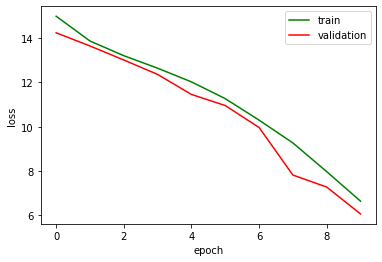

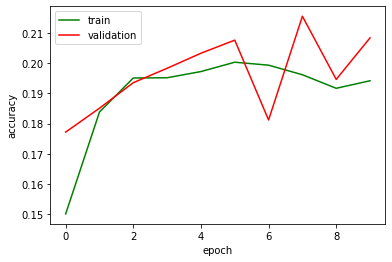

In [20]:
lr=0.01
lin1cof = 0.001
lin2cof =0.01
model = Model(SGD(learning_rate=lr))
model.add(Linear('l1', 3072, 100, l2_coef=lin1cof))
model.add(ReLU('l1_relu'))
model.add(Linear('l2', 100, 10, l2_coef=lin2cof))
model.add(SoftmaxCrossentropy('loss'))
history = model.fit(X_train, y_train, X_val, y_val, batch_size=1024, epochs=10)
plot_history(history)
losses, accs, val_losses, val_accs = history


| lr  |lin1cof|lin2cof|trn acc|val acc|
|-----|-------|-------|-------|-------|
|1.000|0.01000|0.01000|0.10307|0.10720|
|1.000|0.01000|0.00100|0.09963|0.09896|
|1.000|0.01000|0.00010|0.10000|0.09972|
|1.000|0.01000|0.00001|0.10160|0.10145|
|1.000|0.00100|0.01000|0.10166|0.10731|
|1.000|0.00100|0.00100|0.10004|0.09961|
|1.000|0.00100|0.00010|0.10032|0.09549|
|1.000|0.00100|0.00001|0.10010|0.10156|
|1.000|0.00010|0.01000|0.11597|0.13379|
|1.000|0.00010|0.00100|0.10069|0.10037|
|1.000|0.00010|0.00010|0.09965|0.10113|
|1.000|0.00010|0.00001|0.10006|0.09776|
|1.000|0.00001|0.01000|0.11617|0.11599|
|1.000|0.00001|0.00100|0.10024|0.09679|
|1.000|0.00001|0.00010|0.09955|0.10547|
|1.000|0.00001|0.00001|0.09896|0.10362|
|0.100|0.01000|0.01000|0.11214|0.10080|
|0.100|0.01000|0.00100|0.10162|0.10341|
|0.100|0.01000|0.00010|0.10238|0.10710|
|0.100|0.01000|0.00001|0.10425|0.10449|
|0.100|0.00100|0.01000|0.10417|0.10851|
|0.100|0.00100|0.00100|0.10313|0.11176|
|0.100|0.00100|0.00010|0.10720|0.11209|
|0.100|0.00100|0.00001|0.10331|0.11024|
|0.100|0.00010|0.01000|0.10907|0.10395|
|0.100|0.00010|0.00100|0.10089|0.10493|
|0.100|0.00010|0.00010|0.10319|0.10634|
|0.100|0.00010|0.00001|0.10079|0.10080|
|0.100|0.00001|0.01000|0.10500|0.10015|
|0.100|0.00001|0.00100|0.10472|0.10297|
|0.100|0.00001|0.00010|0.10114|0.09863|
|0.100|0.00001|0.00001|0.10478|0.10493|
|0.010|0.01000|0.01000|0.18300|0.19770|
|0.010|0.01000|0.00100|0.19883|0.19629|
|0.010|0.01000|0.00010|0.19269|0.18511|
|0.010|0.01000|0.00001|0.19141|0.18511|
|0.010|0.00100|0.01000|0.21134|0.22526|
|0.010|0.00100|0.00100|0.19930|0.21159|
|0.010|0.00100|0.00010|0.20850|0.20497|
|0.010|0.00100|0.00001|0.19952|0.19900|
|0.010|0.00010|0.01000|0.20174|0.19878|
|0.010|0.00010|0.00100|0.19307|0.19119|
|0.010|0.00010|0.00010|0.19651|0.18859|
|0.010|0.00010|0.00001|0.19881|0.19857|
|0.010|0.00001|0.01000|0.19682|0.17003|
|0.010|0.00001|0.00100|0.19562|0.19792|
|0.010|0.00001|0.00010|0.20296|0.20475|
|0.010|0.00001|0.00001|0.21279|0.21322|
|0.001|0.01000|0.01000|0.16498|0.17611|
|0.001|0.01000|0.00100|0.16526|0.16634|
|0.001|0.01000|0.00010|0.17126|0.18023|
|0.001|0.01000|0.00001|0.14921|0.13770|
|0.001|0.00100|0.01000|0.16817|0.16667|
|0.001|0.00100|0.00100|0.16005|0.15679|
|0.001|0.00100|0.00010|0.16144|0.15668|
|0.001|0.00100|0.00001|0.16870|0.16580|
|0.001|0.00010|0.01000|0.16840|0.17491|
|0.001|0.00010|0.00100|0.16396|0.17676|
|0.001|0.00010|0.00010|0.16919|0.16612|
|0.001|0.00010|0.00001|0.17613|0.17535|
|0.001|0.00001|0.01000|0.16368|0.15148|
|0.001|0.00001|0.00100|0.16876|0.17144|
|0.001|0.00001|0.00010|0.16052|0.16243|
|0.001|0.00001|0.00001|0.16848|0.16515|